# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

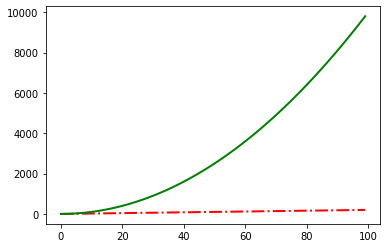

In [3]:
# Method 1
plt.plot(x,y,lw=2,ls='-.',c='red')
plt.plot(x,z,lw=2,ls='-',c='green')
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

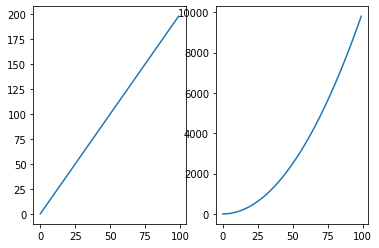

In [4]:
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.plot(x,y)
ax2.plot(x,z)

Text(0.5, 1.0, '(x,z)')

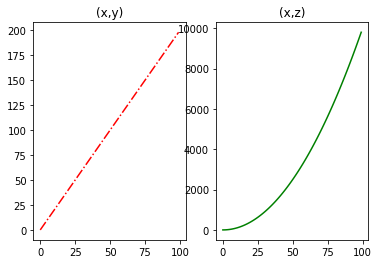

In [5]:
# Method 2
f, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
ax1.plot(x,y, c= 'red',ls='-.')
ax1.set_title('(x,y)')
ax2.plot(x,z, c='green', ls='-')
ax2.set_title('(x,z)')

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

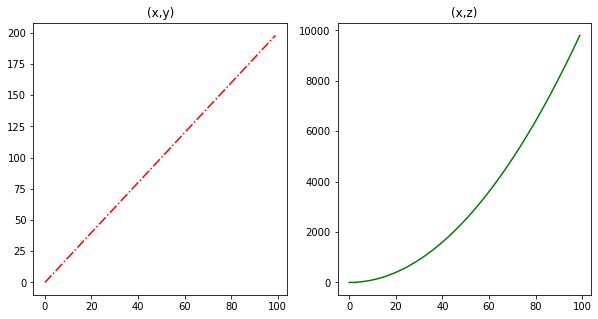

In [6]:
# your code here

f, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax1.plot(x,y,c= 'red',ls='-.')
ax1.set_title('(x,y)')
ax2.plot(x,z, c='green', ls='-')
ax2.set_title('(x,z)');

#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

In [7]:
import math 

y1 = x**2 
y2 = math.e**x

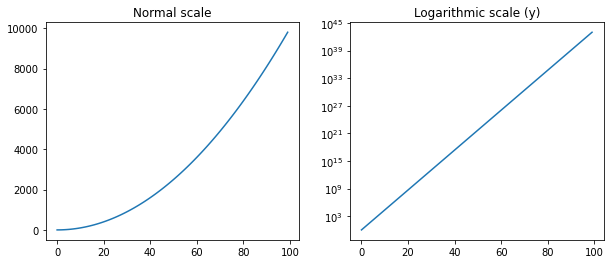

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(x, y1)
axes[0].set_xscale("linear") #the log transformation
axes[0].set_title("Normal scale")

axes[1].plot(x, y2)
axes[1].set_yscale("log") #the log transformation
axes[1].set_title("Logarithmic scale (y)");

#### As a bonus challenge, try to add a legend to the plot.

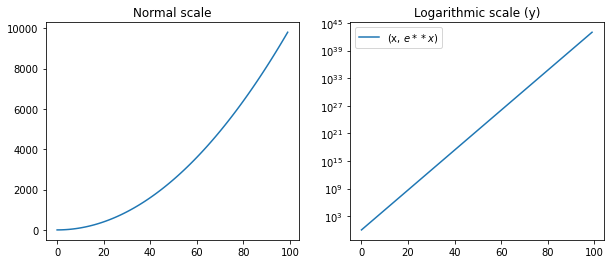

In [9]:
# your code here
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(x, y1, label= '(x, $x**2$)')
axes[0].set_xscale("linear") #the log transformation
axes[0].set_title("Normal scale")

axes[1].plot(x, y2, label= '(x, $e**x$)')
axes[1].set_yscale("log") #the log transformation
axes[1].set_title("Logarithmic scale (y)")

plt.legend();

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. 
* db: `fitbit`
* table: `fitbit2`

In [10]:
# your code here
fitbit = pd.read_csv('Fitbit.csv')
fitbit.columns = [col.replace(' ', '_').lower() for col in fitbit.columns]
fitbit.head(3)

,date,calorie_burned,steps,distance,floors,minutes_sedentary,minutes_lightly_active,minutes_fairly_active,minutes_very_active,activity_calories,minutesofsleep,minutesofbeingawake,numberofawakings,lengthofrestinminutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [11]:
import datetime

In [12]:
fitbit['months_encoded'] = [datetime.datetime.strptime(date,'%d-%m-%Y').month  for date in fitbit['date']]

In [13]:
weekends = ["Saturday", "Sunday"]

week_day_col = [datetime.datetime.strptime(date,'%d-%m-%Y').strftime('%A')  for date in fitbit['date']]
fitbit['week_or_weekend'] = ['Weekend' if day in weekends else 'Weekday' for day in week_day_col]

Text(0, 0.5, 'steps')

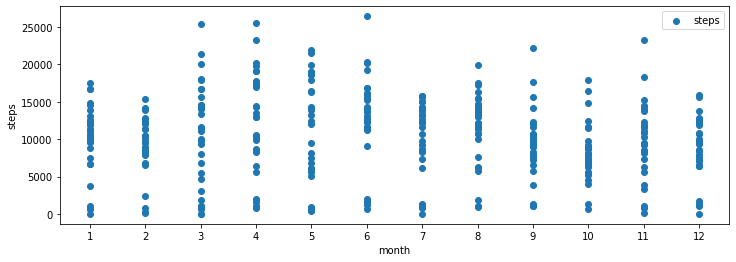

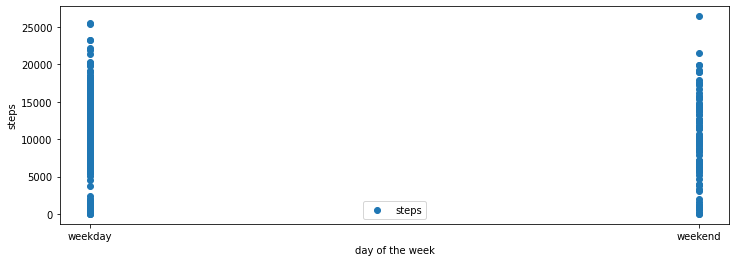

In [14]:
#### MEDIAN STEPS BY MONTH_ENCODED - USING PLT

# your code here
x = fitbit.months_encoded
y=fitbit.steps
plt.figure(figsize=(12,4))
plt.scatter(x,y)
plt.xticks(np.arange(1,13,1))
plt.legend(['steps'])
plt.xlabel('month')
plt.ylabel('steps')

# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here
z = fitbit.week_or_weekend
plt.figure(figsize=(12,4))
plt.scatter(z,y)
plt.xticks(np.arange(0,2,1),labels=['weekday', 'weekend'])
plt.legend(['steps'])
plt.xlabel('day of the week')
plt.ylabel('steps')

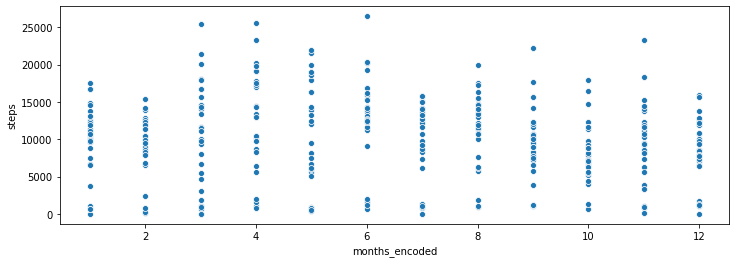

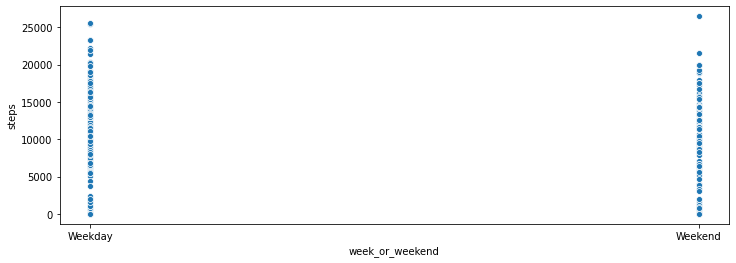

In [15]:
#### MEDIAN STEPS BY MONTH_ENCODED - USING SNS

# your code here
plt.figure(figsize=(12,4))
sns.scatterplot(x = fitbit.months_encoded, y=fitbit.steps)

# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here
plt.figure(figsize=(12,4))
sns.scatterplot(x = fitbit.week_or_weekend, y=fitbit.steps)


#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

In [16]:
fitbit.head(3)

,date,calorie_burned,steps,distance,floors,minutes_sedentary,minutes_lightly_active,minutes_fairly_active,minutes_very_active,activity_calories,minutesofsleep,minutesofbeingawake,numberofawakings,lengthofrestinminutes,months_encoded,week_or_weekend
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417,5,Weekday
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491,5,Weekend
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436,5,Weekend


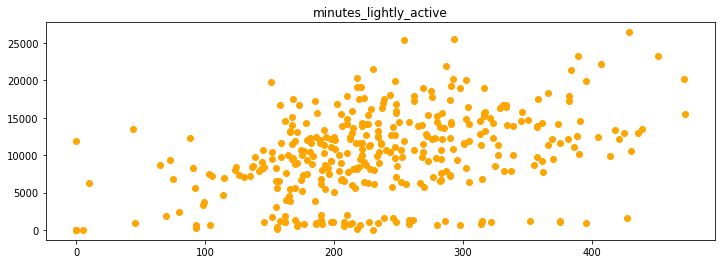

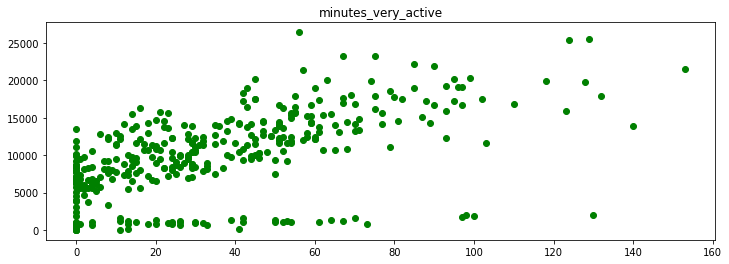

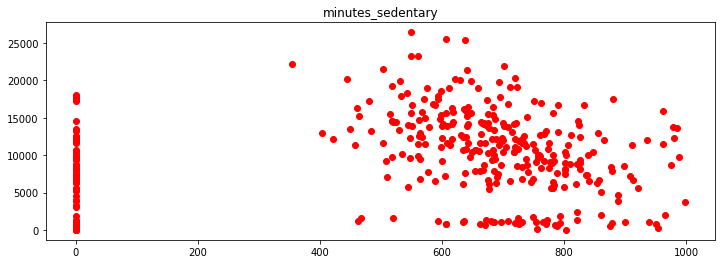

In [17]:
# your code here

features = ['minutes_lightly_active', 'minutes_very_active', 'minutes_sedentary']
colors = ['orange','green', 'red'] 
n=0

for feat in features:
    plt.figure(figsize=(12,4))
    plt.scatter(x = fitbit[feat], y=fitbit.steps, c=colors[n])
    plt.title(feat)
    n+=1

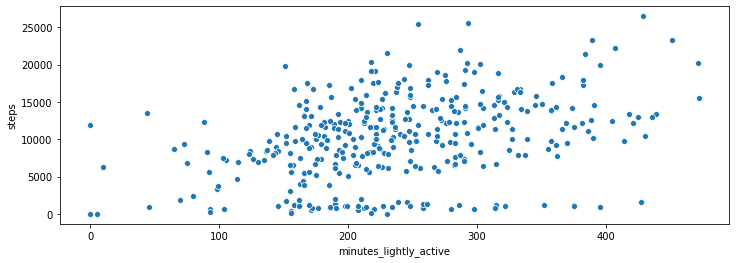

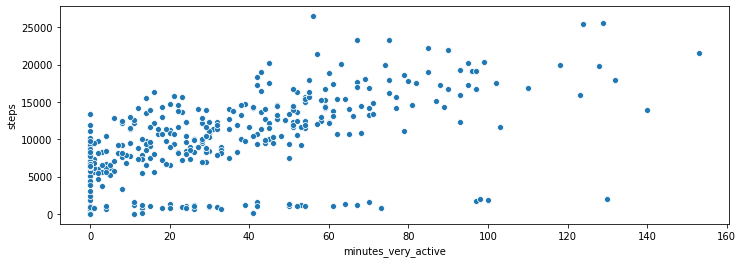

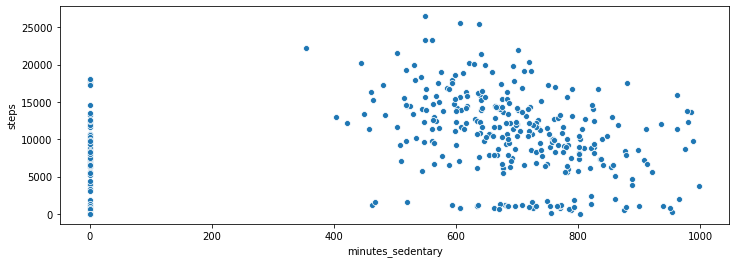

In [18]:
# your code here

features = ['minutes_lightly_active', 'minutes_very_active', 'minutes_sedentary']

for feat in features:
    plt.figure(figsize=(12,4))
    sns.scatterplot(x = fitbit[feat], y=fitbit.steps)

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. 
* db: `titanic`
* table: `titanic`

In [19]:
# your code here
titanic = pd.read_csv('titanic.csv')
titanic.columns = [col.replace(' ', '_').lower() for col in titanic.columns]
titanic.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [20]:
# your code here
titanic.dtypes

passengerid      int64
survived       float64
pclass           int64
name            object
gender          object
age            float64
sibsp            int64
parch            int64
ticket          object
fare           float64
cabin           object
embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [21]:
# NUMERICAL VARIABLES
# your code here
titanic.select_dtypes([int, float]).head()

,passengerid,survived,pclass,age,sibsp,parch,fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [22]:
# CATEGORICAL VARIABLES
# your code here
cat_titanics = titanic.select_dtypes(object)
cat_titanics

,name,gender,ticket,cabin,embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [23]:
# your code here

plt.style.use('classic')
plt.figure(figsize=(12,6));

<Figure size 960x480 with 0 Axes>

#### Use the right visualization to show the distribution of column `Age`.

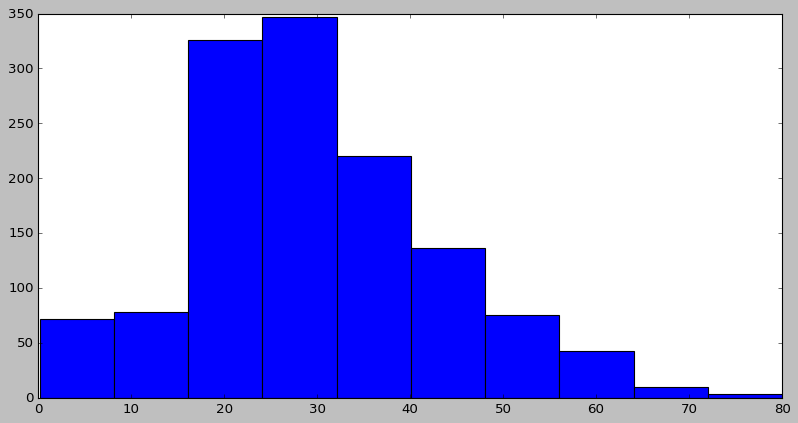

In [24]:
plt.style.use('classic')
plt.figure(figsize=(12,6))
plt.hist(titanic.age,10);

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

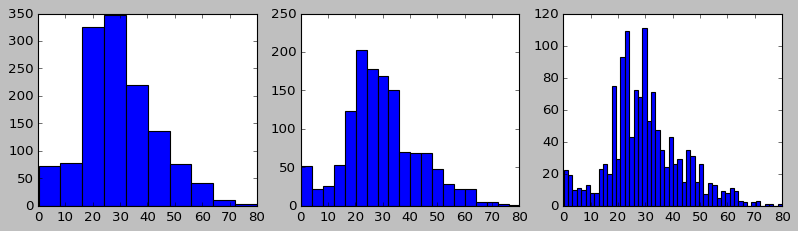

In [25]:
# your code here
fig, axs = plt.subplots(1,3, figsize=(12,3))
axs[0].hist(titanic.age,10)
axs[1].hist(titanic.age,20)
axs[2].hist(titanic.age,50);

#### How does the bin size affect your plot?

In [26]:
"""
it changes de median and mean age.
"""

'\nit changes de median and mean age.\n'

#### Use seaborn to show the distribution of column `Age`.

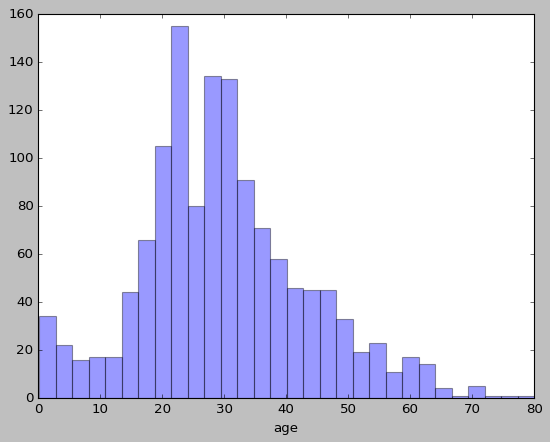

In [27]:
# your code here
sns.distplot(titanic.age, kde=False);

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

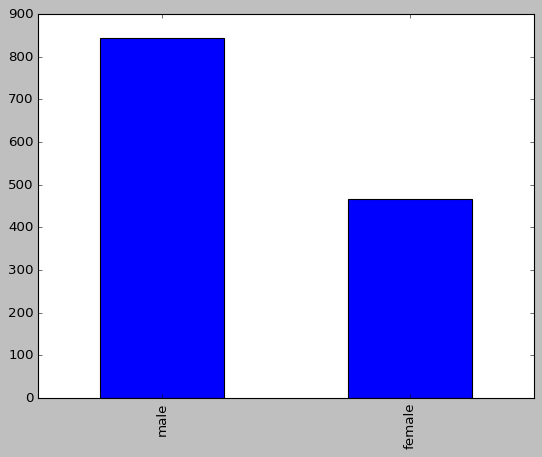

In [28]:
# Method 1.1 - matplotlib
# your code here

cat_titanics.gender.value_counts().plot(kind='bar');

In [29]:
# Method 1.2 - matplotlib
# your code here

males=(titanic.gender=='male').sum()
females=(titanic.gender=='female').sum()
height = [males, females]
y_pos = np.arange(len(height))

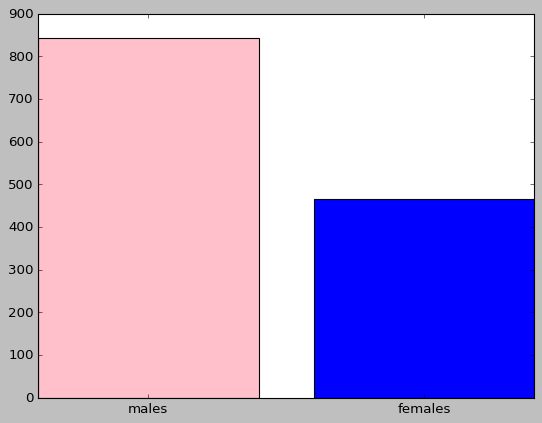

In [30]:
plt.bar(y_pos, height, color=('pink','blue'))
plt.xticks(y_pos, ('males','females'))
plt.show()

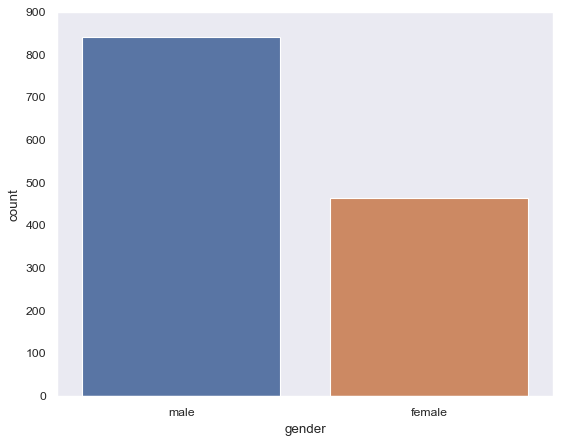

In [31]:
# Method 2 - seaborn
# your code here
sns.set(style="dark")
ax = sns.countplot(x="gender", data=titanic)

#### Use the right plot to visualize the column `Pclass`.

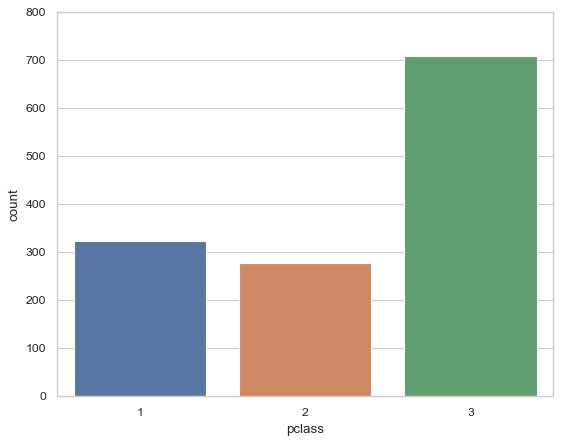

In [32]:
# your code here
sns.set(style="whitegrid")
ax = sns.countplot(x="pclass", data=titanic)

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

In [33]:
# your code here

titanic.age.describe()

count    1309.000000
mean       29.879186
std        13.448335
min         0.170000
25%        22.000000
50%        28.500000
75%        37.000000
max        80.000000
Name: age, dtype: float64

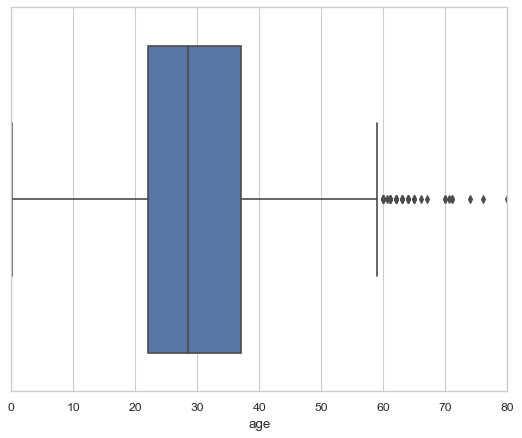

In [34]:
sns.boxplot(titanic["age"]);

In [35]:
"""
your comments here
"""

'\nyour comments here\n'

#### What does the last plot tell you about the feature `Age`?

In [36]:
"""
That people were very young.
"""

'\nThat people were very young.\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

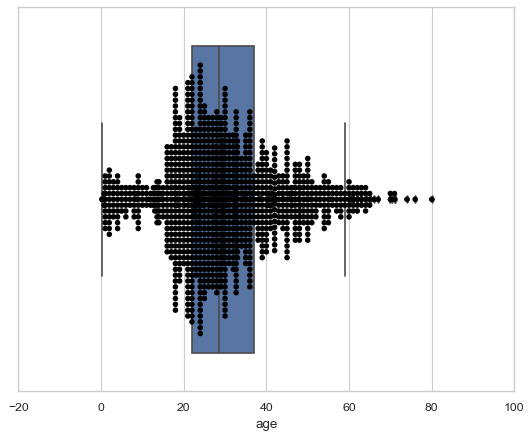

In [37]:
# your code here
sns.swarmplot(titanic.age,color='black')
sns.boxplot(titanic["age"]);

#### What additional information does the last plot provide about feature `Age`?

In [38]:
"""
your comments here
"""

'\nyour comments here\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

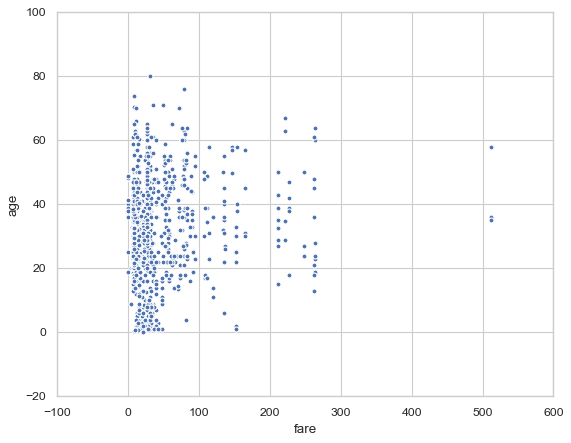

In [39]:
# Method 1 - matplotlib
# your code here

plt.scatter(titanic.fare,titanic.age)
plt.xlabel('fare')
plt.ylabel('age');

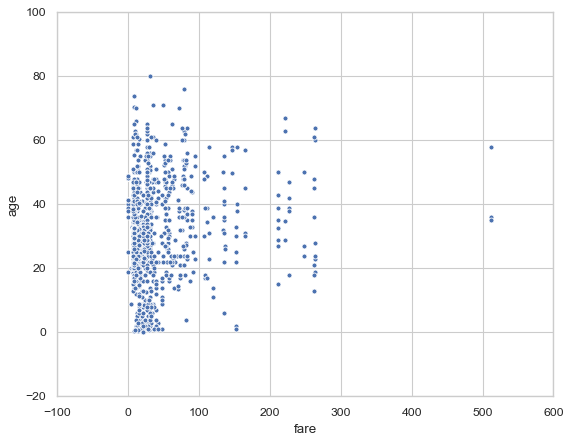

In [40]:
# Method 2 - seaborn
# your code here

sns.scatterplot(titanic.fare,titanic.age);

#### Plot the correlation matrix using seaborn.

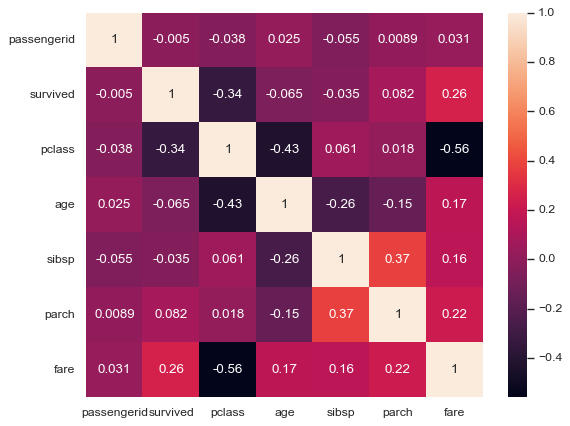

In [41]:
# your code here
sns.heatmap(titanic.corr(),annot=True);

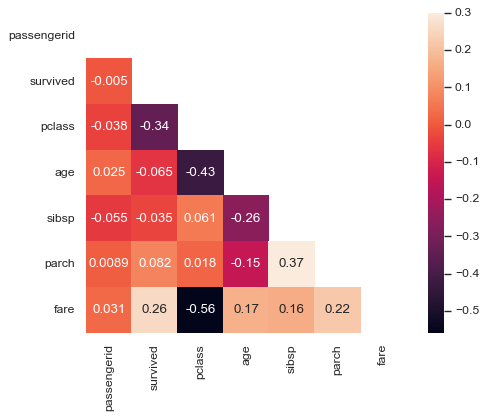

In [44]:
corr = titanic.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True)

#### What are the most correlated features?

In [45]:
"""
The most correlated features are:

- fare + pclass 
- age + pclass
- pclass + survived
"""

'\nThe most correlated features are:\n\n- fare + pclass \n- age + pclass\n- pclass + survived\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

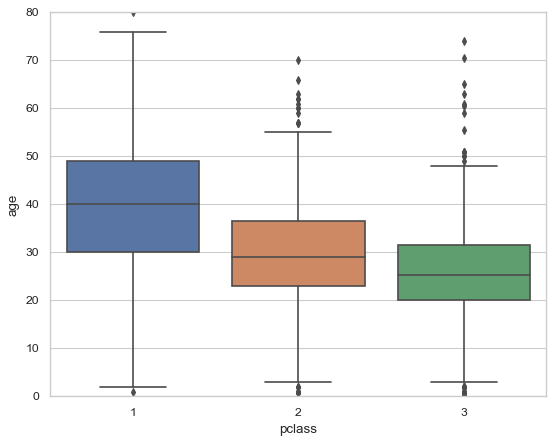

In [46]:
# your code here
sns.boxplot(x=titanic.pclass, y=titanic.age);

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

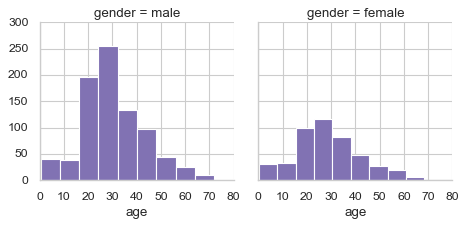

In [47]:
g = sns.FacetGrid(titanic, col="gender")
g = g.map(plt.hist, "age", bins=10, color="m")